In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
X_train,X_test = X_train/255.0 , X_test/255.0

In [24]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [25]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.001),input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(10,activation='softmax')

    
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [29]:
history = model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_test,y_test),callbacks=[early_stopping])

/home/suhas/master_dataklout/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/50
938/938 [==============================] - 44s 46ms/step - loss: 0.5424 - accuracy: 0.9287 - val_loss: 0.2974 - val_accuracy: 0.9814
Epoch 2/50
938/938 [==============================] - 46s 48ms/step - loss: 0.2792 - accuracy: 0.9735 - val_loss: 0.2094 - val_accuracy: 0.9822
Epoch 3/50
938/938 [==============================] - 39s 41ms/step - loss: 0.2211 - accuracy: 0.9752 - val_loss: 0.1807 - val_accuracy: 0.9843
Epoch 4/50
938/938 [==============================] - 39s 41ms/step - loss: 0.2000 - accuracy: 0.9780 - val_loss: 0.1578 - val_accuracy: 0.9906
Epoch 5/50
938/938 [==============================] - 34s 36ms/step - loss: 0.1961 - accuracy: 0.9783 - val_loss: 0.1721 - val_accuracy: 0.9876
Epoch 6/50
938/938 [==============================] - 34s 36ms/step - loss: 0.1960 - accuracy: 0.9792 - val_loss: 0.1684 - val_accuracy: 0.9880
Epoch 7/50
938/938 [==============================] - 34s 36ms/step - loss: 0.1998 - accuracy: 0.9790 - val_loss: 0.1666 - val_accuracy:

In [30]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy:{test_acc}")

313/313 - 2s - loss: 0.1578 - accuracy: 0.9906
Test Accuracy:0.9905999898910522


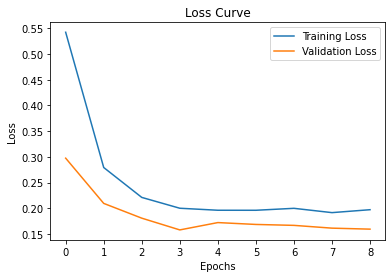

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

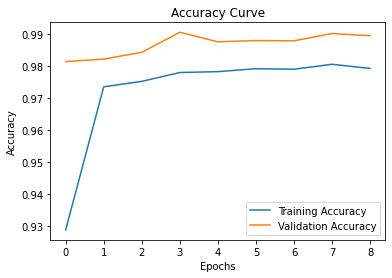

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


## Prediction

In [37]:

single_img = X_test[0].reshape(28, 28, 1)  # (28, 28, 1)
single_img = np.expand_dims(single_img, axis=0)  # (1, 28, 28, 1)

single_predic = model.predict(single_img)
predicted_class = np.argmax(single_predic)

print(predicted_class)


7


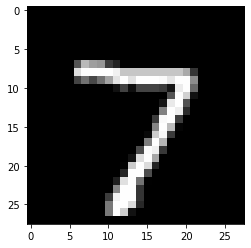

In [35]:
plt.imshow(X_test[0],cmap='gray')

### **Why Do We Reshape to (28, 28, 1) for CNN?**  
CNNs (Convolutional Neural Networks) expect input data in a specific shape:  
**(height, width, channels)**  
where:  
- **Height** = `28` (number of rows in the image)  
- **Width** = `28` (number of columns in the image)  
- **Channels** = `1` (since MNIST is grayscale, only 1 color channel)  



### **1️⃣ What Was the Original Shape?**  
Before reshaping, `X_train` and `X_test` are usually stored in **2D format** (flattened).  
- Example: `(60000, 784)` → This means **60,000 images**, each having **784 pixels** (flattened).  
- But CNNs **expect 3D images** (height × width × channels), not a single long vector.  



### **2️⃣ Why Do We Reshape?**
Since each MNIST image is **28×28 pixels**, we **convert** the flattened 784-pixel format back to its original **(28, 28, 1)** shape using:  
```python
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
```
✅ **`-1` means "let NumPy figure out the batch size."**  
✅ **`(28, 28, 1)` restores the original image dimensions.**  



### **3️⃣ What Happens If We Don’t Reshape?**  
If we don’t reshape, the CNN **won’t recognize the image structure** because it expects input in **(height, width, channels)** format. Instead, it will treat the input as a **1D vector**, losing spatial information, which is crucial for CNNs.  



### **4️⃣ Why `1` in (28, 28, 1)?**
- For **grayscale images (like MNIST)**, we have only **1 color channel** (`1`).
- If it were **RGB images** (like CIFAR-10), we would have `3` channels (`(32, 32, 3) for CIFAR-10`).



### **🔹 Summary**  
✔ **Before Reshape:** `(60000, 784)` → **Flattened pixels (not suitable for CNNs)**  
✔ **After Reshape:** `(60000, 28, 28, 1)` → **Correct 3D shape for CNNs**  
✔ **Why?** CNNs need height, width, and channels to process spatial patterns.  

---

### **Why Use (2,2) Max Pooling?**  

In CNNs, **MaxPooling2D** is used to **reduce the spatial dimensions** of the feature maps while keeping the most important features.  

Your code:  
```python
layers.MaxPooling2D((2, 2))
```
- This **(2,2) pooling** means that we take a **2×2** window and pick the **maximum** value from that region.  
- This effectively **reduces the image size by half** (downsampling), while keeping the most important features.

### **Why Choose (2,2) Instead of Other Sizes?**  

| Pool Size | Effect |
|-----------|--------|
| **(1,1)** | No pooling (does nothing). |
| **(2,2) ✅** | Standard choice. Reduces size **by half**, keeps important features. |
| **(3,3)** | More aggressive pooling (can lose too much information). |
| **(4,4)** | Too much downsampling, may lose fine details. |

- **(2,2) is the most common choice** because:  
  1️⃣ **Reduces computation** while preserving important features.  
  2️⃣ **Avoids losing too much information** (larger pools like (3,3) can be too aggressive).  
  3️⃣ **Prepares data for deeper layers efficiently** (smaller input = faster training).  



### **What Happens During (2,2) Max Pooling?**
Consider a **4×4 feature map**:

```
[ 1, 3, 2, 4 ]
[ 5, 6, 1, 2 ]
[ 2, 8, 3, 1 ]
[ 4, 7, 6, 5 ]
```

- A **(2,2) Max Pooling** will take the **maximum value** from each **2×2** block:

```
[ 6, 4 ]
[ 8, 6 ]
```

Now, the output is **2×2 instead of 4×4**, reducing the size while keeping the strongest features.



### **Conclusion**  
✅ **(2,2) pooling is the best balance** between **reducing computation** and **keeping important details**.  
If we used **(3,3) or (4,4)**, too much information would be lost.  

---

### **Why No `input_shape` in the Second `Conv2D` Layer?**  

When defining the first convolutional layer in a **Keras Sequential model**, you must specify the **input shape**:
```python
layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1))
```
This tells the model that the input images are **28×28 pixels** with **1 channel (grayscale)**.



### **Why Don't We Need `input_shape` in the Second `Conv2D` Layer?**  

After the **first Conv2D layer**, the output shape is automatically computed and passed to the next layer. You don’t need to define it again.

#### **What Happens Internally?**
- The first convolution layer takes an **input image of (28,28,1)**.
- It applies **32 filters of size (3,3)**, producing an output of **(26,26,32)** (because a **3×3 filter reduces dimensions** by 1 on each side if `padding='valid'`).
- The **MaxPooling (2,2)** reduces this further to **(13,13,32)**.
- Now, the **second Conv2D** layer takes this **(13,13,32) input automatically**.



### **Key Reason**
✅ The second convolutional layer **does not need `input_shape` because it gets the output of the first layer automatically**.  

If we explicitly added `input_shape=(13,13,32)` to the second layer, it would be redundant. Keras takes care of this internally.

---

### **Why No MaxPooling After the Third `Conv2D` Layer?**  

The decision to **skip max pooling after the third convolutional layer** is often a design choice based on **preserving spatial information** while still reducing the number of parameters. Let’s break it down.



### **Understanding MaxPooling**  
MaxPooling **(2,2)** reduces the spatial dimensions of the feature maps.  
- The first **MaxPooling (2,2)** reduces the feature map from **(26,26)** → **(13,13)**.  
- The second **MaxPooling (2,2)** reduces the feature map from **(13,13)** → **(6,6)**.  

If we apply **another MaxPooling (2,2)** after the third convolutional layer, the feature map would shrink **too much** (to **(3,3)** or smaller). This might **lose too much spatial information**, making it harder for the model to learn meaningful patterns.



### **Why Skip MaxPooling in the Third Conv Block?**  
1. **Preserve More Spatial Features**  
   - By the time we reach the third convolutional layer, the feature maps are already small.  
   - Skipping max pooling helps retain more spatial information for better feature extraction.

2. **Compensating with Dropout**  
   - Instead of downsampling with pooling, we apply **Dropout (0.4)** to prevent overfitting.  
   - This helps in regularization while still allowing the model to learn complex features.

3. **Progressive Downsampling**  
   - The earlier **two MaxPooling layers** have already reduced the dimensions significantly.
   - Further reducing would **leave very few pixels**, which is not ideal for capturing patterns.



### **Alternative Approach**  
- If your dataset is **large and complex**, you could add a **third MaxPooling (2,2)** to further reduce dimensionality before flattening.
- If you want to **retain more details**, you can **skip pooling** (as done here) and let **Flatten() handle the transition**.



### **Final Thought**  
✅ **Skipping max pooling after the third Conv2D layer allows the network to retain more spatial information while preventing excessive shrinking of feature maps.** Instead, dropout is used to avoid overfitting.

---

### **Why Do We Use `Flatten()` in the Fourth Layer?**  

The **`Flatten()`** layer is used to **convert the 2D feature maps into a 1D vector** before passing it to the fully connected (dense) layers. Let's break it down:



### **1. Understanding Convolutional Layers**  
- The `Conv2D` layers extract features from the input image by applying filters.  
- `MaxPooling2D` progressively reduces the spatial dimensions (height & width) while keeping important features.  
- However, after multiple convolutions and pooling, we still have a **multi-dimensional feature map**.

For example, after the last **Conv2D(128, (3,3))** layer, the feature map might be of shape **(X, X, 128)** (depends on the input size and pooling operations).



### **2. Why Do We Need `Flatten()`?**  
1. **Transition from CNN to Dense Layers**  
   - Fully connected (Dense) layers expect a **1D input vector**, but CNN outputs **multi-dimensional feature maps**.  
   - `Flatten()` **converts** the final feature maps into a **single vector**, making it compatible with the Dense layers.

2. **Extract Meaningful Features for Classification**  
   - Convolutional layers act as **feature extractors** by learning spatial patterns.
   - Fully connected layers act as **classifiers**, taking the extracted features and making predictions.
   - `Flatten()` bridges these two parts by converting spatial features into a form that the Dense layer can process.



### **3. What Happens Without `Flatten()`?**  
- If you remove `Flatten()`, the Dense layers **won’t receive the correct input shape**, leading to an error.  
- CNNs work with **multi-dimensional feature maps**, but Dense layers require **1D input**.  



### **Example: Before & After Flattening**
Imagine the output of the last `Conv2D` layer is a **(3,3,128) tensor** (height=3, width=3, channels=128).  
- Before Flattening: **(3,3,128) → A 3D tensor**  
- After Flattening: **(1152,) → A 1D vector of size 1152 (3×3×128)**  

Now, this **1D vector** can be used as input to the Dense layers for classification.



### **4. What Happens After `Flatten()`?**  
After flattening, the next layers are:  
```python
layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
layers.BatchNormalization(),
layers.Dropout(0.4),
```
- The **Dense(128)** layer learns complex relationships between features.  
- **BatchNormalization** helps stabilize training.  
- **Dropout(0.4)** prevents overfitting.



### **Conclusion**  
✅ `Flatten()` is **necessary** to transition from convolutional feature maps to a fully connected layer. It converts the **multi-dimensional feature map** into a **1D vector**, making it possible to pass information to Dense layers for final classification. 🚀

---